In [1]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Database Connection Parameters
disease_checker = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Alayande1$',
    'database': 'disease_checker',
}


#Connecting to the SQL Database
conn = pymysql.connect(**disease_checker)

In [3]:
HIV_query = "SELECT * FROM HIV"

In [4]:
HIV_df = pd.read_sql(HIV_query, conn)

C:\Users\PC\AppData\Local\Temp\ipykernel_13124\3767008923.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HIV_df = pd.read_sql(HIV_query, conn)


In [5]:
HIV_df = HIV_df.replace({'Yes': 1, 'No': 2, 'Male': 1, 'Female': 2, 'High': 1, 'Medium': 2, 'Low': 3, 'Negative': 4, 'Critical': 5})

In [6]:
correlation_matrix = HIV_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                          id    Gender  Chronic_Diarrhea  Skin_Irritation  \
id                  1.000000  0.008170          0.000761         0.009472   
Gender              0.008170  1.000000          0.007767        -0.009367   
Chronic_Diarrhea    0.000761  0.007767          1.000000         0.005820   
Skin_Irritation     0.009472 -0.009367          0.005820         1.000000   
Genital_Ulcer      -0.001906 -0.024820          0.003624        -0.010825   
Persistent_Fatigue -0.000496 -0.006591         -0.028286        -0.029330   
Severe_Headache    -0.003253  0.023447          0.035415         0.010195   
Weight_Loss         0.006389  0.004235          0.018623        -0.015422   
Vomiting           -0.022151 -0.001824         -0.008907        -0.010299   
Severity           -0.009578  0.004102          0.082791         0.096285   

                    Genital_Ulcer  Persistent_Fatigue  Severe_Headache  \
id                      -0.001906           -0.000496        -0.003253   
Gend

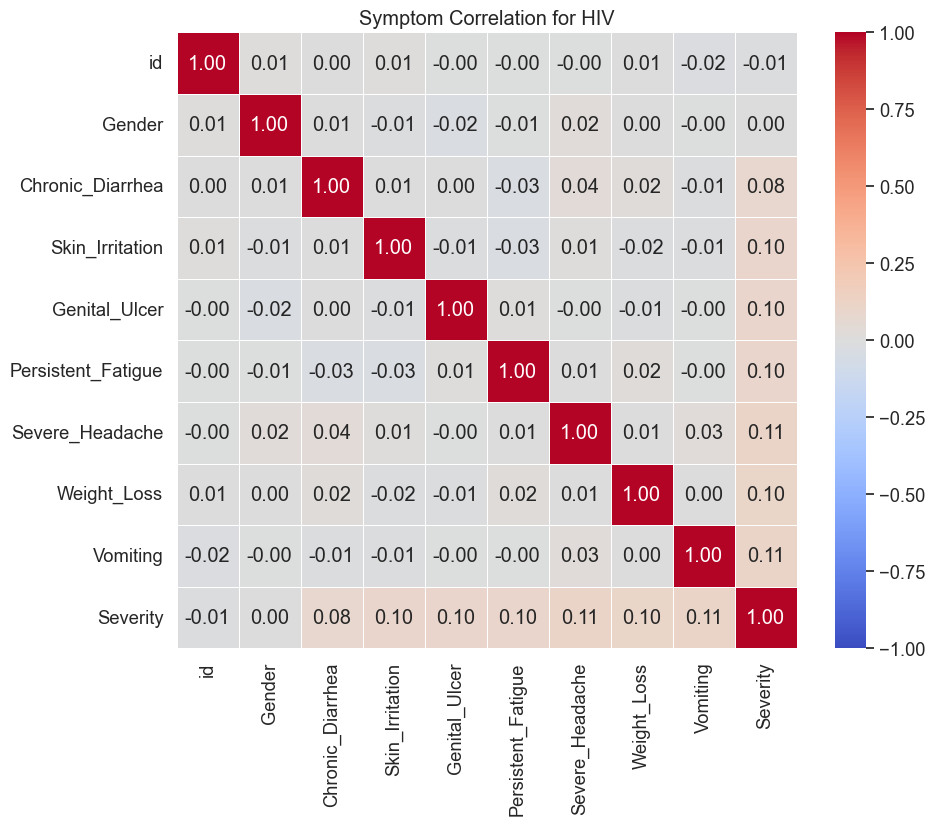

In [8]:
plt.figure(figsize=(10, 8), dpi=100)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Set the font size for the numbers
sns.set(font_scale=1.2)

# Set a title for the heatmap
plt.title("Symptom Correlation for HIV")

# Show the heatmap
plt.show()